In [2]:
import os
import zipfile
'''
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()'''

"\nlocal_zip = '/tmp/rps.zip'\nzip_ref = zipfile.ZipFile(local_zip, 'r')\nzip_ref.extractall('/tmp/')\nzip_ref.close()\n\nlocal_zip = '/tmp/rps-test-set.zip'\nzip_ref = zipfile.ZipFile(local_zip, 'r')\nzip_ref.extractall('/tmp/')\nzip_ref.close()"

In [3]:
normal_dir = os.path.join('C:\\Users\\ronit\\Programming\\AI\\kaggle_data\\chest_xray3\\train\\NORMAL')
vir_dir = os.path.join('C:\\Users\\ronit\\Programming\\AI\\kaggle_data\\chest_xray3\\train\\VIRUS')
bac_dir = os.path.join('C:\\Users\\ronit\\Programming\\AI\\kaggle_data\\chest_xray3\\train\\BACTERIA')

traincount = len(os.listdir(normal_dir)) + len(os.listdir(bac_dir)) + len(os.listdir(vir_dir))


print('training class distribution:', 100*len(os.listdir(vir_dir))/traincount, 'percent virus |', 
                                      100*len(os.listdir(bac_dir))/traincount, 'percent bacteria |', 
                                      100*len(os.listdir(normal_dir))/traincount, 'percent normal')

normal_files = os.listdir(normal_dir)

vir_files = os.listdir(vir_dir)

bac_files = os.listdir(bac_dir)


training class distribution: 29.017312850524263 percent virus | 46.08632040965618 percent bacteria | 24.896366739819555 percent normal


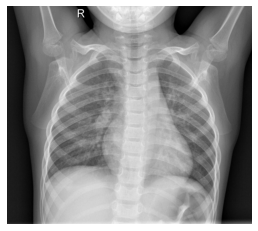

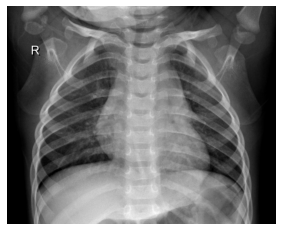

UnidentifiedImageError: cannot identify image file 'C:\\Users\\ronit\\AI\\kaggle_data\\chest_xray3\\train\\VIRUS\\desktop.ini'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

pic_index = 2

nextNormal = [os.path.join(normal_dir, fname) 
                for fname in normal_files[pic_index-2:pic_index]]
nextVir = [os.path.join(vir_dir, fname) 
                for fname in vir_files[pic_index-2:pic_index]]
nextBac = [os.path.join(bac_dir, fname) 
                for fname in bac_files[pic_index-2:pic_index]]


for i, img_path in enumerate(nextNormal+nextVir+nextBac):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img, cmap = 'gray')
  plt.axis('Off')
  plt.show()

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'


TRAINING_DIR = "C:\\Users\\ronit\\Programming\\AI\\kaggle_data\\chest_xray3\\train\\"
training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='reflect',
                                      )

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32,
  shuffle = True
)


VALIDATION_DIR = "C:\\Users\\ronit\\Programming\\AI\\kaggle_data\\chest_xray3\\test\\"
validation_datagen = ImageDataGenerator(rescale = 1./255)


validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32,
  shuffle = True
)

Found 4100 images belonging to 3 classes.
Found 878 images belonging to 3 classes.


In [5]:
imgs, labels = next(train_generator)
labels[:10]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))
    
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
    
model.add(Conv2D(256, (5,5), activation='relu'))
model.add(MaxPooling2D(2,2))   

model.add(Conv2D(512, (5,5), activation='relu'))
model.add(MaxPooling2D(2,2))   

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       819456    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 512)       3

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from datetime import datetime

estop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=13)



log_dir = 'C:\\Users\\ronit\\AI\\kaggle_ml\\tensorboard'
timestamp = datetime.now().strftime("%Y-%m-%d--%H%M"+'_(lung_model3c)')
log_dir = log_dir + '\\' + timestamp

tboard = TensorBoard(log_dir=log_dir, 
                    histogram_freq=1,
                    write_graph=True,
                    write_images=True,
                    update_freq='epoch',
                    profile_batch=2,
                    embeddings_freq=1)

cpoint = ModelCheckpoint(filepath = 'C:\\Users\\ronit\\AI\\kaggle_ml\\lung_model_3classes_{val_accuracy: .2f}val_acc.h5', 
                         save_best_only = True, 
                         save_weights_only = False, 
                         monitor = 'val_accuracy',
                         mode = 'max')

In [8]:
history = model.fit(train_generator, 
                    epochs=100, 
                    steps_per_epoch=127, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=26,
                    callbacks = [estop, tboard, cpoint])

Epoch 1/100
127/127 [==============================] - 86s 678ms/step - loss: 1.0341 - accuracy: 0.4893 - val_loss: 1.0190 - val_accuracy: 0.5481
Epoch 2/100
127/127 [==============================] - 76s 602ms/step - loss: 0.9054 - accuracy: 0.5662 - val_loss: 1.0321 - val_accuracy: 0.5841
Epoch 3/100
127/127 [==============================] - 75s 593ms/step - loss: 0.8869 - accuracy: 0.5805 - val_loss: 0.9778 - val_accuracy: 0.6010
Epoch 4/100
127/127 [==============================] - 75s 593ms/step - loss: 0.8616 - accuracy: 0.5927 - val_loss: 0.9911 - val_accuracy: 0.4952
Epoch 5/100
127/127 [==============================] - 76s 599ms/step - loss: 0.8853 - accuracy: 0.5932 - val_loss: 0.9711 - val_accuracy: 0.5361
Epoch 6/100
127/127 [==============================] - 77s 605ms/step - loss: 0.8512 - accuracy: 0.6117 - val_loss: 0.9033 - val_accuracy: 0.6046
Epoch 7/100
127/127 [==============================] - 75s 592ms/step - loss: 0.8228 - accuracy: 0.6318 - val_loss: 1.0082 -

In [1]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

NameError: name 'history' is not defined

In [9]:
pwd

'c:\\Users\\ronit\\AI\\kaggle_ml'

In [10]:
'''from tensorflow.keras.models import load_model

model.save('lung_model.h5')'''

In [11]:
print(log_dir)

C:\Users\ronit\AI\kaggle_ml\tensorboard\2020-06-24--2033_(lung_model)


In [9]:
'''import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)'''

'import numpy as np\nfrom google.colab import files\nfrom keras.preprocessing import image\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n \n  # predicting images\n  path = fn\n  img = image.load_img(path, target_size=(150, 150))\n  x = image.img_to_array(img)\n  x = np.expand_dims(x, axis=0)\n\n  images = np.vstack([x])\n  classes = model.predict(images, batch_size=10)\n  print(fn)\n  print(classes)'